In [2]:
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [3]:
DIR = Path('/juice5b/scr5b/sampark/src/levanter2/out_dir/test_cfx_fineweb_debug_Aug8/')

In [16]:
y_null = np.load(DIR / 'null/reward.npy')
metagrads = np.load(DIR / 'null/metagrads.npy')

In [5]:
y_null, metagrads.shape

(array(-8.383333, dtype=float32), (100000,))

In [6]:
metagrads[10*1024:]

array([0.01013947, 0.00599189, 0.00914504, ..., 0.        , 0.        ,
       0.        ], shape=(89760,), dtype=float32)

In [33]:
ys = []
masks = []

for i in range(40):
    if os.path.exists(DIR / f'{i}/reward.npy'):
        y = np.load(DIR / f'{i}/reward.npy')
        mask = np.load(DIR / f'{i}/data_weight_vector.npy')

        ys.append(y_null.item() - y.item())
        masks.append(mask)
    else:
        print(i)

ys = np.array(ys)
ys

array([0.01082897, 0.01090813, 0.01164055, 0.01191139, 0.0116806 ,
       0.01159859, 0.01034641, 0.01147366, 0.01086617, 0.01167774,
       0.01119137, 0.0116396 , 0.01113987, 0.01069164, 0.01082897,
       0.01137447, 0.01119423, 0.01079845, 0.01226044, 0.01196957,
       0.01112461, 0.01122284, 0.01085186, 0.01134014, 0.01100445,
       0.01176739, 0.01149368, 0.01160717, 0.01100731, 0.0116272 ,
       0.01179218, 0.01139069, 0.01082325, 0.01229286, 0.01141453,
       0.01101875, 0.01169395, 0.01129055, 0.01170921, 0.01120472])

In [34]:
for i in range(10):
    print(masks[i][:40 * 256].mean())

0.9489258
0.95166016
0.9484375
0.9490234
0.95166016
0.9488281
0.953125
0.9488281
0.94814456
0.9493164


In [54]:
N = 1024 * 1000

y_preds = np.array([metagrads.sum() - (metagrads * masks[i])[:N].sum() for i in range(len(masks))])
y_preds

array([10.157257 , 10.233582 , 10.96817  , 11.16214  , 11.087021 ,
       10.844498 ,  9.682556 , 10.814957 , 10.185928 , 10.858978 ,
       10.491974 , 10.914612 , 10.511017 , 10.118912 , 10.072479 ,
       10.759186 , 10.595596 , 10.158493 , 11.331696 , 11.286453 ,
       10.514435 , 10.665665 , 10.219559 , 10.711395 , 10.500061 ,
       10.956146 , 10.824112 , 10.911209 , 10.405212 , 10.85527  ,
       11.0217285, 10.639618 , 10.158798 , 11.481689 , 10.80983  ,
       10.428116 , 11.007599 , 10.704102 , 11.013718 , 10.442871 ],
      dtype=float32)

In [51]:
masks[0]

array([1., 0., 1., ..., 1., 1., 1.], shape=(100000,), dtype=float32)

In [36]:
ys

array([0.01082897, 0.01090813, 0.01164055, 0.01191139, 0.0116806 ,
       0.01159859, 0.01034641, 0.01147366, 0.01086617, 0.01167774,
       0.01119137, 0.0116396 , 0.01113987, 0.01069164, 0.01082897,
       0.01137447, 0.01119423, 0.01079845, 0.01226044, 0.01196957,
       0.01112461, 0.01122284, 0.01085186, 0.01134014, 0.01100445,
       0.01176739, 0.01149368, 0.01160717, 0.01100731, 0.0116272 ,
       0.01179218, 0.01139069, 0.01082325, 0.01229286, 0.01141453,
       0.01101875, 0.01169395, 0.01129055, 0.01170921, 0.01120472])

In [38]:
y_preds

array([-203.82047, -203.74414, -203.00955, -202.81558, -202.8907 ,
       -203.13322, -204.29517, -203.16277, -203.7918 , -203.11874,
       -203.48575, -203.06311, -203.4667 , -203.85881, -203.90524,
       -203.21854, -203.38213, -203.81923, -202.64603, -202.69127,
       -203.46329, -203.31206, -203.75816, -203.26633, -203.47766,
       -203.02158, -203.15361, -203.06651, -203.57251, -203.12245,
       -202.956  , -203.3381 , -203.81892, -202.49603, -203.1679 ,
       -203.5496 , -202.97012, -203.27362, -202.964  , -203.53485],
      dtype=float32)

In [42]:
masks[0]

array([1., 0., 1., ..., 1., 1., 1.], shape=(100000,), dtype=float32)

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        4.0000e+00, 1.2000e+01, 2.3000e+01, 5.9000e+01, 9.5000e+01,
        2.6300e+02, 5.3700e+02, 1.0120e+03, 2.1120e+03, 7.0967e+04,
        2.3111e+04, 1.3620e+03, 2.6100e+02, 9.5000e+01, 4.1000e+01,
        1.6000e+01, 1.0000e+01, 2.0000e+00, 4.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-0.11188694, -0.10408188, -0.09627683, -0.08847178, -0.08066672,
        -0.07286167, -0.06505661, -0.05725156, -0.0494465 , -0.04164145,
        -0.03383639, -0.02603134, -0.01822629, -0.01042123, -0.00261617,
         0.00518887,  0.01299393,  0.02079899,  0.02860404,  0.0364091 ,
         0.04421415,  0.0520192 ,  0.05982427,  0.06762931,  0.07543436,
         0.08323943,  0.09104448,  0.09884953,  0.10665459,  0.11445964,
         0.12226468]),
 <BarContainer object of 30 artists>)

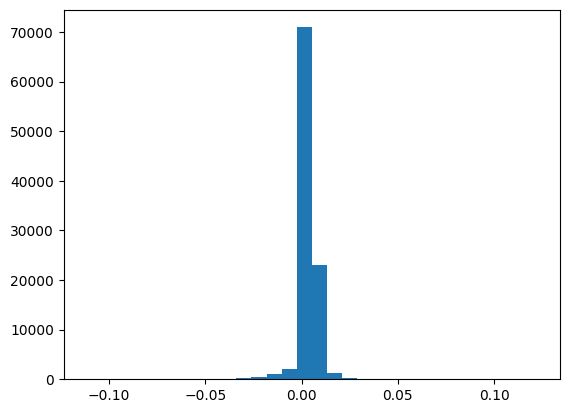

In [41]:
plt.hist(metagrads, bins=30)

Text(0, 0.5, 'Predicted')

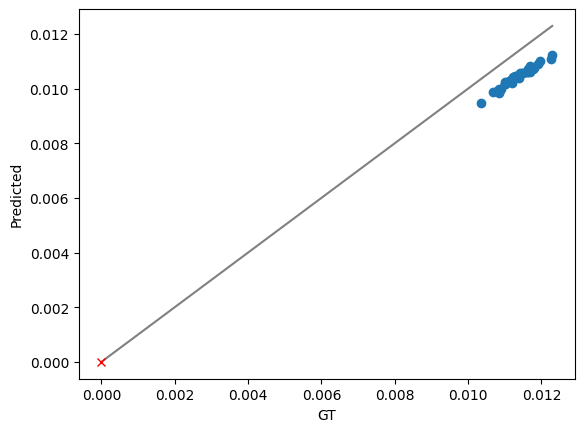

In [67]:
gts = ys
preds = y_preds / 1024

plt.scatter(ys, preds)

m, M = min(gts.min(), preds.min()), max(gts.max(), preds.max())

plt.plot([0, M], [0, M], color='grey', linestyle='-')
plt.plot([0], [0], color='red', marker='x')

plt.xlabel('GT')
plt.ylabel('Predicted')

In [44]:
ys.min(), ys.max()

(np.float64(0.010346412658691406), np.float64(0.012292861938476562))

In [45]:
y_preds.min(), y_preds.max()

(np.float32(-204.29517), np.float32(-202.49603))

In [21]:
spearmanr(-ys, y_preds)

SignificanceResult(statistic=np.float64(0.9854120748211045), pvalue=np.float64(7.7676522073345165e-31))

In [15]:
import json
from itertools import islice

path = "/juice5/scr5/nlp/data/huggingface/lingua-data/fineweb_edu_10bt_shuffled/fineweb_edu_10bt.chunk.00.jsonl"
k = 10                      # how many examples you want to inspect

with open(path, "r", encoding="utf-8") as f:
    for idx, line in enumerate(islice(f, k)):
        obj = json.loads(line)
        print(f"[{idx}] {json.dumps(obj, indent=2)[:2000]}")  # truncate if the example is huge

[0] {
  "text": "|Henry Gray (18251861). Anatomy of the Human Body. 1918.|\n|tubercle on its posterior surface, medial to the groove for the tendon of the Flexor hallucis longus. The deep fibers (anterior talotibial) are attached, above, to the tip of the medial malleolus, and, below, to the medial surface of the talus. The deltoid ligament is covered by the tendons of the Tibialis posterior and Flexor digitorum longus.|\n| The anterior and posterior talofibular and the calcaneofibular ligaments were formerly described as the three fasciculi of the external lateral ligament of the ankle-joint.|\nThe Anterior Talofibular Ligament. (ligamentum talofibulare anterius) (Fig. 355).The anterior talofibular ligament, the shortest of the three, passes from the anterior margin of the fibular malleolus, forward and medially, to the talus, in front of its lateral articular facet.\nThe Posterior Talofibular Ligament (ligamentum talofibulare posterius) (Fig. 355).The posterior talofibular ligament, 